In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. Load the Data
Keras comes with the MNIST data loader. It has a function mnist.load_data() which downloads the data from its servers if it is not present on your computer. The data loaded using this function is divided into training and test sets. This is done by the following :

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


3. Checkout the data
Let’s see how the data looks like. The data consists of handwritten numbers ranging from 0 to 9, along with their ground truth. It has 60,000 train samples and 10,000 test samples. Each sample is a 28×28 grayscale image.

Training data shape : (60000, 28, 28) (60000,)
Testing data shape : (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

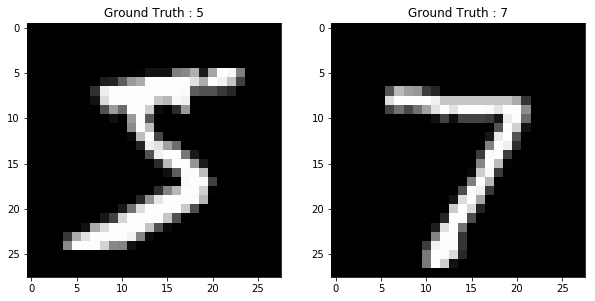

In [3]:
from keras.utils import to_categorical

print('Training data shape :', train_images.shape, train_labels.shape)
print('Testing data shape :', test_images.shape, test_labels.shape)

#Find the unique number from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ',nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])
           
#Display the first image in the training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap = 'gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

#Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:],cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

Process the data
The images are grayscale and the pixel values range from 0 to 255.
- Convert each image matrix ( 28x28 ) to an array ( 28*28 = 784 dimenstional ) which will be fed to the network as a single feature.
- We convert the data to float and scale the values between 0 to 1.
- We also convert the labels from integer to categorical (one-hot) encoding since that is the format required by Keras to perform multiclass classification. One-hot encoding is a type of boolean representation of integer data. It converts the integer to an array of all zeros except a 1 at the index of the number. For example, using a one-hot encoding of 10 classes, the integer 5 will be encoded as 0000010000

In [4]:
# Change from matrix to array
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

In [5]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [6]:
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [7]:
# Change the labels from integers to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [8]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical (one hot) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical (one hot) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Network

In [9]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(512,activation = 'relu', input_shape = (dimData,)))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(nClasses, activation = 'softmax'))

# COnfigure the ntwork
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Train the network
history = model.fit(train_data,train_labels_one_hot, batch_size = 256, epochs = 20, verbose = 1,
                   validation_data = (test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.2732 - acc: 0.9166 - val_loss: 0.2015 - val_acc: 0.9355
Epoch 2/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0921 - acc: 0.9714 - val_loss: 0.0895 - val_acc: 0.9729
Epoch 3/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0581 - acc: 0.9814 - val_loss: 0.0724 - val_acc: 0.9786
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0395 - acc: 0.9878 - val_loss: 0.0696 - val_acc: 0.9785
Epoch 5/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0291 - acc: 0.9907 - val_loss: 0.0672 - val_acc: 0.9808
Epoch 6/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0209 - acc: 0.9931 - val_loss: 0.0847 - val_acc: 0.9781
Epoch 7/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0167 - acc: 0.9942 - val_loss: 0.0752 - val_acc

# Loss and Accuracy Curves

Text(0.5, 1.0, 'Loss Curves')

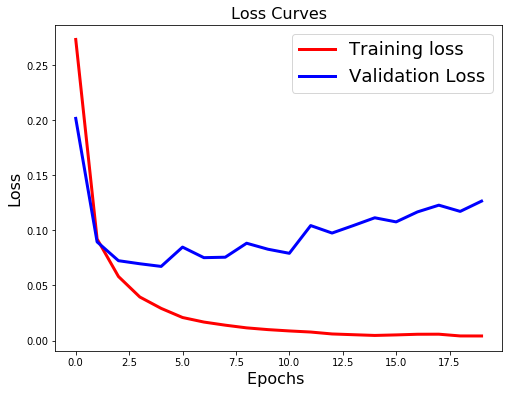

In [10]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

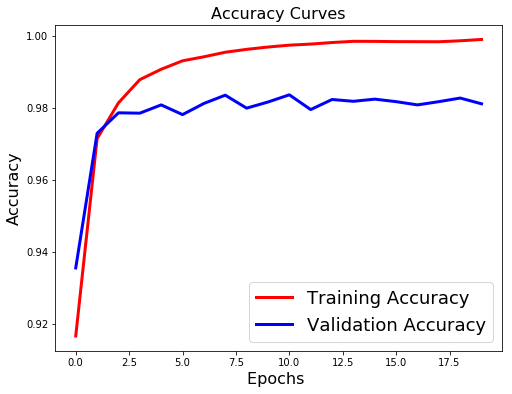

In [11]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [12]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, Accuracy = {}".format(test_loss,test_acc))

10000/10000 [==============================] - 1s 75us/step
Evaluation result on Test Data : Loss = 0.12647828286730345, Accuracy = 0.9811


# New Network with Dropout Regularization

In [13]:
from keras.layers import Dropout
model_reg = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512,activation = 'relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation = 'softmax',))

# Configure the network
model_reg.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# #Train Model
history_reg = model_reg.fit(train_data,train_labels_one_hot, batch_size = 256, epochs = 20, verbose = 1, validation_data = (test_data,test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.5692 - acc: 0.8233 - val_loss: 0.2278 - val_acc: 0.9364
Epoch 2/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.3324 - acc: 0.8985 - val_loss: 0.1612 - val_acc: 0.9534
Epoch 3/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.2686 - acc: 0.9180 - val_loss: 0.1370 - val_acc: 0.9583
Epoch 4/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.2343 - acc: 0.9289 - val_loss: 0.1177 - val_acc: 0.9640
Epoch 5/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.2127 - acc: 0.9342 - val_loss: 0.1091 - val_acc: 0.9675
Epoch 6/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.1995 - acc: 0.9389 - val_loss: 0.1019 - val_acc: 0.9683
Epoch 7/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1904 - acc: 0.9420 - val_loss: 0.0915 - val_acc

Text(0.5, 1.0, 'Loss Curves')

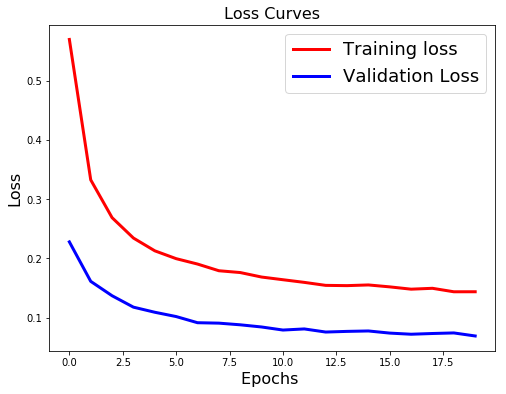

In [14]:
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

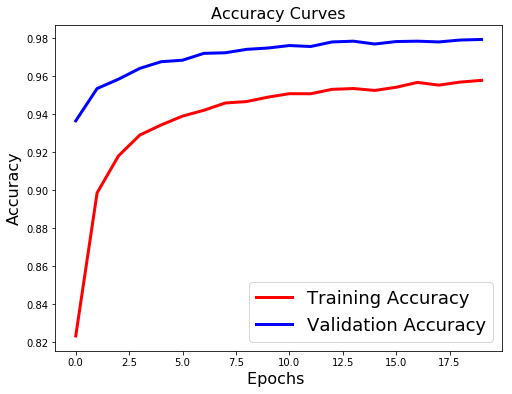

In [15]:
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [16]:
[test_loss, test_acc] = model_reg.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss,test_acc))

10000/10000 [==============================] - 1s 71us/step
Evaluation result on Test Data : Loss = 0.06910467153962235, accuracy = 0.9792
